<a href="https://colab.research.google.com/github/johanik/ML_study/blob/main/BDA712_00_Lab09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Session \# 09


---


by Josué Obregón <br>
BDA712-00 - Machine Learning Programming <br>
Department of Big Data Analytics - Kyung Hee University<br>

## Objective

The objective of this worksheet is to introduce the student to data cleaning and data transformation.

First, some techniques to handle missing data gonna be introduced.

Second, various techniques for transforming numerical variables will be studied. These techniques include Feature Scaling, Feature Transformation, and Feature Discretization.

And third, different coding techniques for categorical variables will ve presented. These techniques include classical and contrast encoders.

It is also intended that the student practice the use of these techniques with the libraries available in the Python language.



## Importing libraries and uploading data to various pandas [DataFrames](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


The libraries we'll import to start with are pandas and numpy for data handling, and matplotlib, seaborn, and plotly for display generation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning data

## Missing data

Let's learn how to use a simple imputer to replace missing values with different strategies

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
X1 = [[7, 2, 3], [4, np.nan, 6], [10, 5, 9]]
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
pd.DataFrame(X1)

,0,1,2
0,7,2.0,3
1,4,NaN,6
2,10,5.0,9


In [4]:
imp_mean.fit(X1)

SimpleImputer()

In [5]:
pd.DataFrame(imp_mean.transform(X1))

,0,1,2
0,7.0,2.0,3.0
1,4.0,3.5,6.0
2,10.0,5.0,9.0


In [6]:
X2 = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
pd.DataFrame(X2)

,0,1,2
0,NaN,2.0,3
1,4.0,NaN,6
2,10.0,NaN,9


In [7]:
pd.DataFrame(imp_mean.transform(X2))

,0,1,2
0,7.0,2.0,3.0
1,4.0,3.5,6.0
2,10.0,3.5,9.0


In [8]:
imp_mean.statistics_

array([7. , 3.5, 6. ])

You can also check the [KNN imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer). Can you guess how this work?

Another way is to add an indicator variable to denote that there are missing values

In [9]:
from sklearn.impute import MissingIndicator

In [10]:
indicator = MissingIndicator(features='all', error_on_new=False)
indicator.fit(X1)

MissingIndicator(error_on_new=False, features='all')

In [11]:
indicator.transform(X2)

array([[ True, False, False],
       [False,  True, False],
       [False,  True, False]])

# Loading data and checking outliers

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [13]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [14]:
#X, y = data.data, data.target

df = pd.DataFrame(data.data, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df,data.target, shuffle=True,test_size = 0.25, random_state=712 )

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [15]:
X_train = X_train.copy()

## Overview of the dataset and removing outliers

In [16]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.861731,28.588372,5.424765,1.095334,1425.278359,3.008388,35.627668,-119.562800
std,1.880197,12.588856,2.315685,0.447110,1136.006138,5.286262,2.134114,2.001199
min,0.499900,1.000000,0.846154,0.444444,3.000000,0.750000,32.540000,-124.350000
25%,2.559800,18.000000,4.442168,1.005592,786.000000,2.433883,33.930000,-121.770000
50%,3.543550,29.000000,5.234243,1.048023,1167.500000,2.824752,34.260000,-118.500000
75%,4.736900,37.000000,6.052381,1.099490,1732.000000,3.286539,37.710000,-118.000000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,599.714286,41.950000,-114.310000


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 10391 to 16429
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36b0180150>,
      dtype=object)

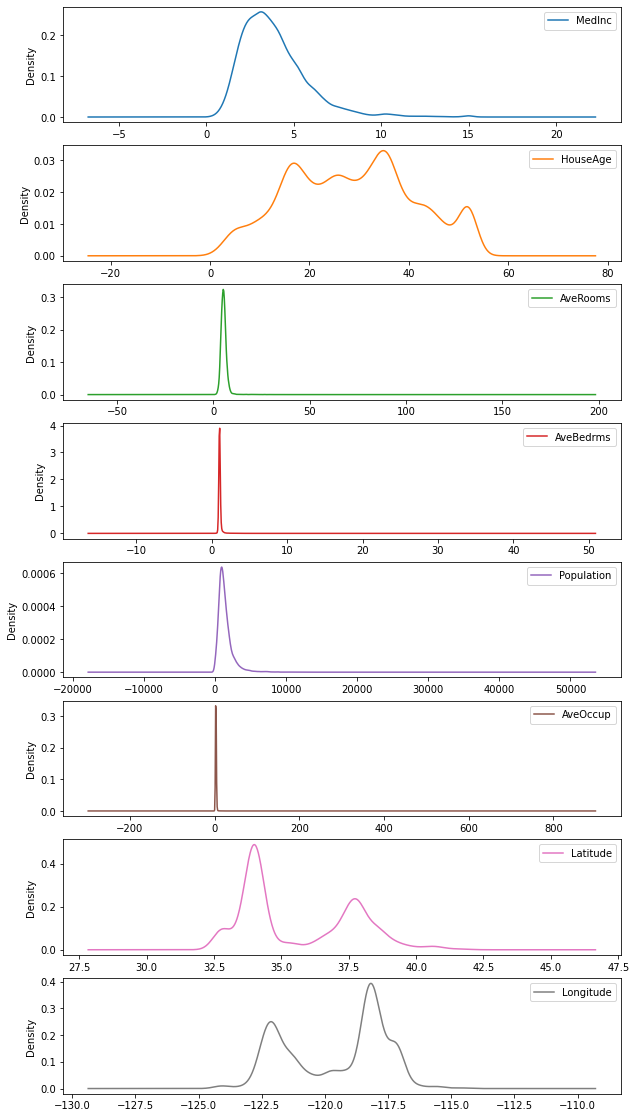

In [18]:
X_train.plot.kde(subplots=True, figsize=(10,20), sharex=False)

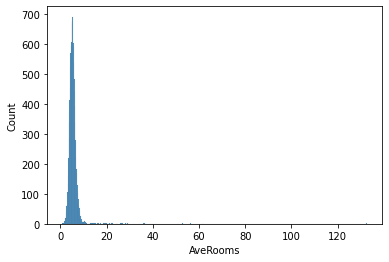

In [19]:
sns.histplot(data=X_train, x='AveRooms')

In [20]:
X_train['AveRooms'].quantile([0.1, 0.5, 0.9, 0.95, 0.99])

0.10     3.789901
0.50     5.234243
0.90     6.949711
0.95     7.621966
0.99    10.389467
Name: AveRooms, dtype: float64

In [21]:
X_train_99 = X_train[X_train['AveRooms']<X_train['AveRooms'].quantile(0.99)].copy()

In [22]:
X_train_99.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.00000,15325.000000
mean,3.858829,28.698532,5.280798,1.066798,1433.951843,3.012213,35.61549,-119.568251
std,1.872197,12.569164,1.236694,0.131820,1137.113957,5.311717,2.12748,2.001296
min,0.499900,1.000000,0.846154,0.444444,3.000000,0.750000,32.54000,-124.350000
25%,2.558300,18.000000,4.434322,1.005017,794.000000,2.436923,33.93000,-121.790000
50%,3.541700,29.000000,5.219766,1.047109,1173.000000,2.830357,34.25000,-118.490000
75%,4.738100,37.000000,6.018868,1.097297,1740.000000,3.291322,37.71000,-118.010000
max,15.000100,52.000000,10.386667,3.187970,35682.000000,599.714286,41.95000,-114.550000


In [23]:
X_train_99_2 = X_train.copy()
X_train_99_2[X_train['AveRooms']>X_train['AveRooms'].quantile(0.99)] = X_train['AveRooms'].quantile(0.99)
X_train_99_2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.924220,28.515205,5.331950,1.160145,1419.697827,3.086080,35.362904,-118.266994
std,1.973022,12.638238,1.331472,0.937437,1140.249942,5.335853,3.284692,13.091635
min,0.499900,1.000000,0.846154,0.444444,3.000000,0.750000,10.389467,-124.350000
25%,2.565425,18.000000,4.442168,1.005592,783.000000,2.441291,33.920000,-121.770000
50%,3.558700,29.000000,5.234243,1.048023,1166.000000,2.837905,34.240000,-118.470000
75%,4.794600,37.000000,6.052381,1.099490,1729.250000,3.311486,37.700000,-117.990000
max,15.000100,52.000000,10.389467,10.389467,35682.000000,599.714286,41.950000,10.389467


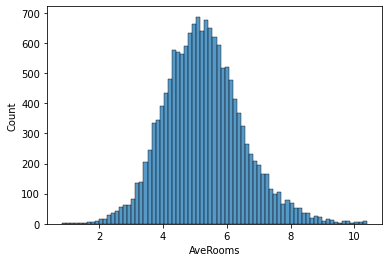

In [24]:
sns.histplot(data=X_train_99, x='AveRooms')

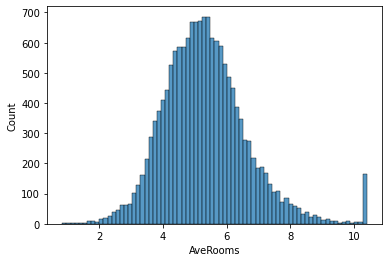

In [25]:
sns.histplot(data=X_train_99_2, x='AveRooms')

In [25]:
X_train_99['MedInc'].plot(kind = 'kde')
sns.kdeplot(data=X_train_99)

In [28]:
from sklearn.preprocessing import PowerTransformer

In [30]:
bx_transformer = PowerTransformer()

In [31]:
col_name = "MedInc"
trans_col_name = "MedInc_bx"
X_train[trans_col_name] = bx_transformer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = bx_transformer.fit_transform(X_train_99[[col_name]])

In [ ]:
X_train_99[trans_col_name].plot

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize = (16,6))
sns.histplot(data=X_train_99, )

In [33]:
bx_transformer.lambdas_

array([-0.17491551])

In [34]:
from scipy.stats import probplot

In [61]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_bx,AveRooms_mm,AveRooms_sd
10391,7.8061,2.0,11.110599,1.631336,703.0,3.239631,33.58,-117.65,1.776549,0.077946,2.455437
5873,4.0742,46.0,5.305439,1.004184,661.0,2.765690,34.17,-118.36,0.333002,0.033863,-0.051531
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69,0.247428,0.039973,0.295947
18334,4.5987,37.0,3.590184,1.072393,1363.0,1.672393,37.45,-122.16,0.601058,0.020837,-0.792267
1408,2.5268,19.0,4.484882,1.088466,1896.0,2.123180,37.94,-122.06,-0.700076,0.027632,-0.405890
...,...,...,...,...,...,...,...,...,...,...,...
11830,2.8603,17.0,6.427562,1.374558,736.0,2.600707,39.15,-120.87,-0.437212,0.042384,0.433060
7959,4.7361,44.0,5.518987,1.126582,783.0,3.303797,33.88,-118.18,0.666411,0.035484,0.040690
7221,2.6964,47.0,3.493377,0.986755,1303.0,4.314570,34.02,-118.16,-0.562905,0.020102,-0.834073
2646,2.4896,33.0,5.711864,0.991525,573.0,2.427966,40.57,-124.11,-0.731203,0.036949,0.123985


In [45]:
X_train_99

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_bx
5873,4.0742,46.0,5.305439,1.004184,661.0,2.765690,34.17,-118.36,0.333824
19197,3.9191,36.0,6.110063,1.059748,711.0,2.235849,38.45,-122.69,0.248114
18334,4.5987,37.0,3.590184,1.072393,1363.0,1.672393,37.45,-122.16,0.602358
1408,2.5268,19.0,4.484882,1.088466,1896.0,2.123180,37.94,-122.06,-0.700394
3169,1.7716,29.0,4.131617,1.077253,2949.0,4.218884,35.24,-118.91,-1.422599
...,...,...,...,...,...,...,...,...,...
11830,2.8603,17.0,6.427562,1.374558,736.0,2.600707,39.15,-120.87,-0.437343
7959,4.7361,44.0,5.518987,1.126582,783.0,3.303797,33.88,-118.18,0.667839
7221,2.6964,47.0,3.493377,0.986755,1303.0,4.314570,34.02,-118.16,-0.563134
2646,2.4896,33.0,5.711864,0.991525,573.0,2.427966,40.57,-124.11,-0.731539


((array([-3.91485749, -3.69536558, -3.57511557, ...,  3.57511557,
          3.69536558,  3.91485749]),
  array([-3.40660411, -3.40660411, -3.40660411, ...,  3.19865232,
          3.19865232,  3.19865232])),
 (0.999908580901331, 1.7806307902527283e-16, 0.9996654186557833))

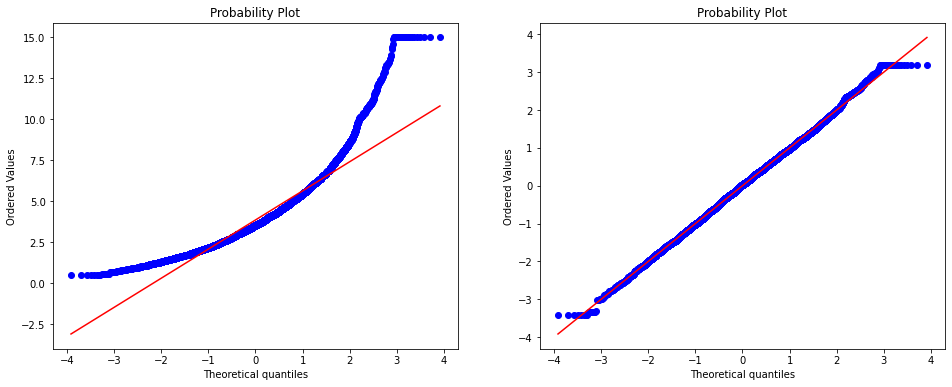

In [36]:
fig, axes = plt.subplots(ncols=2, figsize = (16,6))
probplot(X_train_99[col_name], plot = axes[0])
probplot(X_train_99[trans_col_name], plot = axes[1])

# Engineering numeric predictors

In [56]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
my_transformer = FunctionTransformer(np.log)

In [62]:
col_name = "MedInc"
trans_col_name = "MedInc_bx"
X_train[trans_col_name] = bx_transformer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = bx_transformer.fit_transform(X_train_99[[trans_col_name]])

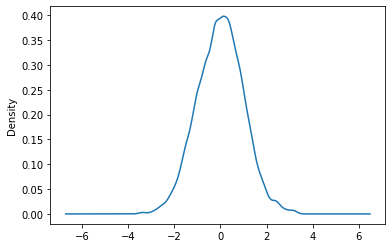

In [63]:
X_train[trans_col_name].plot.kde()

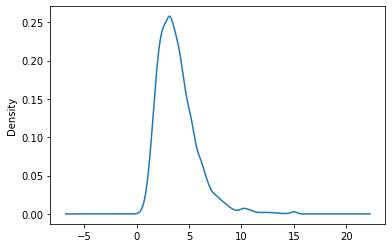

In [64]:
X_train[col_name].plot.kde()

In [ ]:
original featrue box-cox

In [67]:
col_name = 'HouseAge'
trans_col_name = 'HouseAge_bx'
X_train[trans_col_name] = bx_transformer.fit_transform(X_train[[col_name]])
# X_train_99[trans_col_name] = bx_transformer.fit_transform(X_train_99[[trans_col_name]])

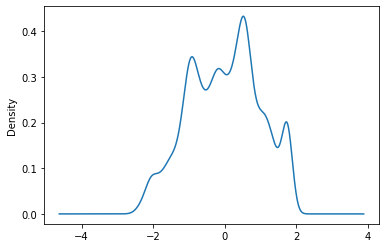

In [71]:
X_train[trans_col_name].plot.kde() # box-cox data가 없음 in X_train_99 

In [74]:
from sklearn.preprocessing import Binarizer

In [76]:
col_name = "MedInc"
trans_col_name = "MedInc_bin"
X_train[trans_col_name] = binarizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = binarizer.fit_transform(X_train_99[[trans_col_name]])

NameError: ignored

## Feature Scaling
---

**Some commonly used models**
  
|Algorithm name | Do you need scaling? |
|--|--|
| SVM, KNN, PCA, K-Means, Linear Regression, Logistic Regression, Linear Discriminant Analysis| $\checkmark$ |
| Naïve Bayes, Tree-Based models | $\times$ |


### Min-Max scaling

Suppose we want to rescale the attribute in the range $(a,b)$

Formula: ${x}' = a + \frac{x - \mathrm{min}(x)\times (b - a) }{\mathrm{max}(x) -\mathrm{min}(x)} $

This method is very sensitive to outliers because they affect both min$(x)$ and max$(x)$

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
mm_scaler =MinMaxScaler()

In [48]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_mm'
X_train[trans_col_name] = mm_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = mm_scaler.fit_transform(X_train_99[[col_name]])

In [49]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f36cb263560> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f36cb268050> (for post_execute):


KeyboardInterrupt: ignored

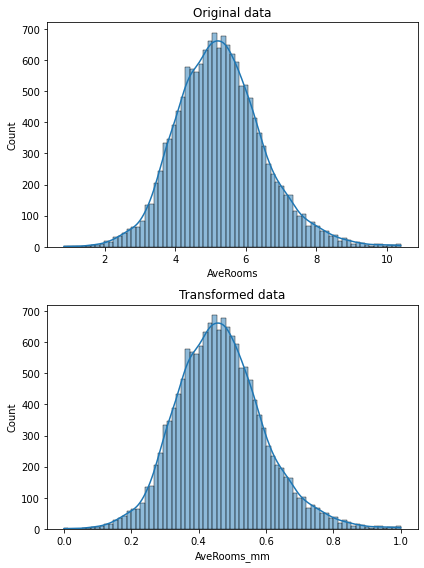

In [50]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

### Standardization or Normalization

Formula: ${z} = \frac{x - \mu }{\sigma}$

Where $\mu$ is the mean of $X$ and $\sigma$ is the standard deviation.

This method is also sensitive to outliers because they affect both $\mu$ and $\sigma$

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sd_scaler = StandardScaler()

In [53]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_sd'
X_train[trans_col_name] = sd_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = sd_scaler.fit_transform(X_train_99[[col_name]])

KeyboardInterrupt: ignored

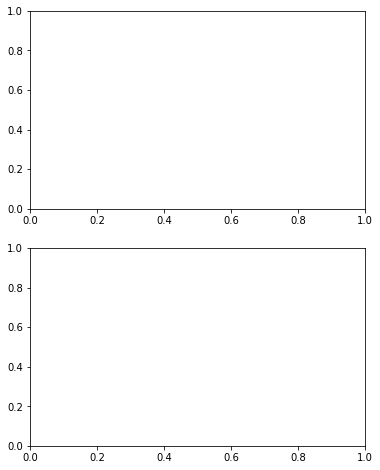

In [54]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1], kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

In [ ]:
sd_scaler.mean_

In [ ]:
sd_scaler.var_

### Robust Scaling

Suppose we want to scale the attribute in the range of quantiles $(a, b)$

Formula: ${x}' = \frac{x - \mathrm{median}(x)}{\mathrm{quantile}(x,b) - \mathrm{quantile}(x,a)}$

This method is more robust to outliers.

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rb_scaler = RobustScaler()

In [ ]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_rb'
X_train[trans_col_name] = rb_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = rb_scaler.fit_transform(X_train_99[[col_name]])

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

## Feature Transformation
---

### Box-Cox transformation

The Box-Cox transformation works only for strictly positive numbers. The transformation is defined as follows:

$x_i'(\lambda) = \left\{\begin{matrix}
  \frac{x_i^\lambda - 1}{\lambda}& if \lambda \neq 0\\
  log(\lambda)& if \lambda = 0
\end{matrix}\right.$

### Yeo-Johnson Transformation

The Yeo-Johnson transformation works for both positive and negative values. The transformation is defined as follows:

$x_i(\lambda) = \left\{\begin{matrix}
\frac{[(x_i + 1)^{\lambda} -1]}{\lambda} & if \, \, \lambda\neq 0, x_i \geq 0 \\
ln(x_i + 1) & if \, \, \lambda = 0, x_i \geq 0\\
-\frac{[(-x_i + 1)^{2- \lambda} -1]}{2-\lambda} & if \, \, \lambda\neq 2, x_i < 0 \\
-ln(-x_i + 1) & if \, \, \lambda = 2, x_i < 0\\
\end{matrix}\right.$


Usually the values of $\lambda$ between $[-5.5]$ are considered and the optimal value that stabilizes the variance and minimizes the asymmetry is selected using MLE (Maximum Likelihood Estimate)

In [ ]:
X_train_99['MedInc']

5873     4.0742
19197    3.9191
18334    4.5987
1408     2.5268
3169     1.7716
          ...  
11830    2.8603
7959     4.7361
7221     2.6964
2646     2.4896
16429    5.5942
Name: MedInc, Length: 15325, dtype: float64

In [ ]:
col_name = 'MedInc'
trans_col_name = 'MedInc_bx'


In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))


In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))



In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0,0],kde=True)
probplot(X_train[col_name], plot=axes[0,1])
axes[0,0].set_title('Original data')
axes[0,1].set_title(axes[0,1].get_title()+' Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1,0], kde=True)
probplot(X_train[trans_col_name], plot=axes[1,1])
axes[1,0].set_title('Transformed data')
axes[1,1].set_title(axes[1,1].get_title()+' Transformed data')
plt.tight_layout()

np.log

np.reciprocal

np.sqrt

np.cbrt

Lest try with another attribute

In [ ]:
col_name = 'HouseAge'
trans_col_name = 'HouseAge_bx'


In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0,0],kde=True)
probplot(X_train[col_name], plot=axes[0,1])
axes[0,0].set_title('Original data')
axes[0,1].set_title(axes[0,1].get_title()+' Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1,0], kde=True)
probplot(X_train[trans_col_name], plot=axes[1,1])
axes[1,0].set_title('Transformed data')
axes[1,1].set_title(axes[1,1].get_title()+' Transformed data')
plt.tight_layout()

## Feature Discretization
---

### Binarization

Convert numeric variables to binary responses

In [ ]:
col_name = 'MedInc'
trans_col_name = 'MedInc_bin'

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))


In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Histogram with whole training data')
sns.countplot(data=X_train_99, x=trans_col_name, ax=axes[1])
axes[1].set_title('Count plot with the binarized data (threshold of 6)')
plt.tight_layout()

### Uniform binning

Map numeric variables into uniform blocks

In [77]:
from sklearn.preprocessing import KBinsDiscretizer

In [78]:
n_bins = 5

In [79]:
col_name = 'Population'
trans_col_name = 'Population_ubin'

In [80]:
ubin_discretizer = KBinsDiscretizer(n_bins = n_bins, encode = "ordinal", strategy = "uniform") 

In [81]:
X_train[trans_col_name] = ubin_discretizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name] = ubin_discretizer.fit_transform(X_train_99[[trans_col_name]])

KeyError: ignored

In [ ]:
col_name = 'Population'
trans_col_name = 'Population_ubin'

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in ubin_discretizer.bin_edges_[0]: # uniform bins
    line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['Uniform in edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'Uniform binning result ({n_bins} bins)')
plt.tight_layout()

### *k*-means binning


Map numeric variables into *k* blocks using clustering techniques

In [ ]:
col_name = 'Population'
trans_col_name = 'Population_kbin'

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in kbin_discretizer.bin_edges_[0]: # kmeans bins
    line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['k-means bin Edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'k-means binning result ({n_bins} bins)')
plt.tight_layout()

### Quantile binning

Map numerical variables in blocks with uniform frequencies


In [ ]:
col_name = 'Population'
trans_col_name = 'Population_qbin'

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in qbin_discretizer.bin_edges_[0]: # quantile bins
  line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['Quantile bin Edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'Quantile binning result ({n_bins} bins)')
plt.tight_layout()

# Encoding categorical predictors

In [82]:
!mkdir data

In [83]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq', # okc_train  https://drive.google.com/file/d/16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq/view?usp=sharing
        ]
outputs = ['okc_train.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq
To: /content/data/okc_train.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 208MB/s]


In [84]:
df = pd.read_csv('data/okc_train.csv',index_col=0)

In [85]:
df

,age,diet,drinks,drugs,education,height,income,last_online,offspring,pets,...,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile
1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.420945,other,1
4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,likes_cats,...,0,0,0,0,0,0,1,2.671173,other,3
6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,likes_cats,...,0,0,0,0,0,0,1,3.391112,stem,5
8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.090611,other,6
10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.382377,other,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,52,diet_missing,socially,never,graduated_from_college_university,70,missing,0,doesnt_want_kids,likes_dogs_and_has_cats,...,0,0,0,0,0,0,1,3.651666,other,51742
59943,24,mostly_anything,often,sometimes,working_on_college_university,72,missing,2,doesnt_have_kids,likes_dogs_and_likes_cats,...,0,0,0,0,1,0,1,3.475526,other,51744
59944,42,mostly_anything,not_at_all,never,graduated_from_masters_program,71,inc100000,4,doesnt_have_kids,pets_missing,...,0,0,0,0,0,0,0,3.265996,other,51745
59945,27,mostly_anything,socially,often,working_on_college_university,73,missing,8,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,0,3.298853,other,51746


In [86]:
df['drinks'].value_counts()

socially          27521
rarely             3981
often              3413
not_at_all         2157
drinks_missing     1208
very_often          319
desperately         210
Name: drinks, dtype: int64

In [88]:
df['diet'].value_counts()

diet_missing           14698
mostly_anything        11430
anything                4096
strictly_anything       3440
mostly_vegetarian       2313
mostly_other             700
strictly_vegetarian      588
vegetarian               448
strictly_other           304
mostly_vegan             220
other                    217
strictly_vegan           142
vegan                     82
mostly_kosher             59
mostly_halal              39
strictly_kosher           11
strictly_halal            10
kosher                     9
halal                      3
Name: diet, dtype: int64

Small test dataset for some explanations and for the figures on the slides


In [89]:
df_test = pd.DataFrame({
... 'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC',
... 'Seattle', 'Seattle', 'Seattle'],
... 'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]
... })

In [90]:
df_test

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


In [92]:
df_test['City'].unique()

array(['SF', 'NYC', 'Seattle'], dtype=object)

For this worksheet we are going to use the [category_encoders](http://contrib.scikit-learn.org/category_encoders/index.html) library, which is compatible with scikit-learn.

In [93]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 676 kB/s 


# Unsupervised Encoders

### One-Hot Encoder

In [95]:
col = 'drinks'

In [96]:
from category_encoders import OneHotEncoder

In [97]:
noehot_enc = OneHotEncoder(use_cat_name = True, handle_missing = 'indicator', handle_unknown = 'indicator')

TypeError: ignored

### Dummy Coding

In [98]:
col='drinks'

In [99]:
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder_sk

In [100]:
dummy_enc = OneHotEncoder_sk(drop='first', sparse = False)

In [101]:
dummy_enc.fit_transform(df[[col]])

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [102]:
dummy_enc.get_feature_names_out()

array(['drinks_drinks_missing', 'drinks_not_at_all', 'drinks_often',
       'drinks_rarely', 'drinks_socially', 'drinks_very_often'],
      dtype=object)

### Binary Encoder

In [106]:
from category_encoders import BinaryEncoder

In [107]:
bin_encoder = BinaryEncoder()

In [ ]:
bin_encoder.fit_transform(df[[col]])

In [110]:
bin_encoder.mapping[0]['mapping']

TypeError: ignored

### Frequency or Count Encoder

In [111]:
from category_encoders import CountEncoder

In [112]:
count_enc = CountEncoder()

Let's try using the group merge functions


### Ordinal Encoder

In [114]:
from category_encoders import OrdinalEncoder

In [115]:
ord_enc = OrdinalEncoder()

In [116]:
ord_enc.fit_transform(df[col]).haed(3)

AttributeError: ignored